In [1]:
pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 42.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import mysql.connector

try:
    conn = mysql.connector.connect(
        host="mysql",  # MySQL 서버주소
        user="root",
        password="1234"
    )
    if conn.is_connected():
        print("MySQL 서버에 성공적으로 연결되었습니다.")
except mywql.connector.Error as err:
    print("MySQL 연결실패", err)
finally:
    if conn.is_connected():
        print("연결중..")

MySQL 서버에 성공적으로 연결되었습니다.
연결중..


In [3]:
# 커서 생성
cursor = conn.cursor()
que = "CREATE DATABASE IF NOT EXISTS judb"
cursor.execute(que)
conn.close()

In [4]:
# MySQL에 연결
conn = mysql.connector.connect(
        host="mysql",  # MySQL 서버주소
        user="root",
        password="1234",
        database = "judb"  # 사용할 데이터베이스 / DB없으면 에러
    )
cursor = conn.cursor()
print("MySQL 서버에 성공적으로 연결되었습니다.")

MySQL 서버에 성공적으로 연결되었습니다.


In [5]:
# 테이블 생성
query = "CREATE TABLE IF NOT EXISTS users(id INT AUTO_INCREMENT PRIMARY KEY ,name VARCHAR(50), age INT, city VARCHAR(50))"
# IF NOT EXISTS = 제약쿼리 (해당 테이블이 없다면)
cursor.execute(query)
print("테이블 생성완료")

테이블 생성완료


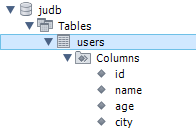

In [7]:
# 단일데이터 삽입
sql = "INSERT INTO users (name, age, city) VALUES (%s, %s, %s)"
values = ("Alice", 25, "Seoul")
cursor.execute(sql, values)
conn.commit()
print("1개의 데이터를 삽입하였습니다, ID : ", cursor.lastrowid)

1개의 데이터를 삽입하였습니다, ID :  1


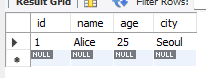

In [8]:
# 여러개의 데이터 삽입
m_values = [("Superman", 33, "Busan"),("Cutegirl", 17, "Incheon"),("Coolboy", 22, "Jeju")]
cursor.executemany(sql, m_values)
conn.commit()
print("여러개의 데이터를 삽입하였습니다")

여러개의 데이터를 삽입하였습니다


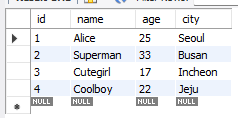

In [12]:
# 모든 데이터 조회
que = "SELECT * FROM users"
cursor.execute(que)
users = cursor.fetchall()

In [13]:
print(users)

[(1, 'Alice', 25, 'Seoul'), (2, 'Superman', 33, 'Busan'), (3, 'Cutegirl', 17, 'Incheon'), (4, 'Coolboy', 22, 'Jeju')]


In [14]:
for user in users:
    print(user)

(1, 'Alice', 25, 'Seoul')
(2, 'Superman', 33, 'Busan')
(3, 'Cutegirl', 17, 'Incheon')
(4, 'Coolboy', 22, 'Jeju')


In [15]:
# 특정 조건 데이터 조회 / 24세 이상
que = "SELECT * FROM users"
filters = " WHERE age >= 24"
cursor.execute(que+filters)

filtered = cursor.fetchall()
for f in filtered:
    print(f)

(1, 'Alice', 25, 'Seoul')
(2, 'Superman', 33, 'Busan')


In [17]:
# 특정 사용자의 나이 수정
sql = "UPDATE users SET age = %s WHERE name = %s"
values = (29, "Alice")
cursor.execute(sql, values)
conn.commit()
print("수정된 행 개수:", cursor.rowcount)

수정된 행 개수: 1


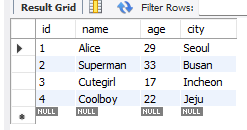

In [21]:
# 특정 조건 사용자 삭제
que = "DELETE FROM users WHERE age > %s AND city = %s"
filters = (20 , "jeju")
cursor.execute(que, filters)
conn.commit()
print(f"{filters}에 해당하는 목록을 삭제하였습니다.")

('jeju',)에 해당하는 목록을 삭제하였습니다.


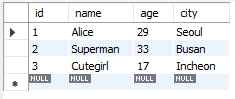